In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import seaborn as sns
sns.set()
plt.rcParams['figure.dpi'] = 120

In [3]:
cd ..

/Share/home/shibinbin/projects/DeepShape


In [6]:
summary = pd.read_table('output/rfam/summary/summarize_evaluate_hits.txt')
summary.head()

,accuracy,bg_percent,method,motif_id,n_seq,overlap_mean,overlap_std,precision,recall,seq_length
0,0.987,0,mixture_vae,5S_rRNA,1000,0.073227,0.062925,1.000000,0.987,300
1,0.449,50,mixture_vae,5S_rRNA,1000,0.065269,0.063112,0.468864,0.768,300
2,0.949,0,mixture_vae,tRNA,1000,0.079041,0.097396,1.000000,0.949,300
3,0.490,50,mixture_vae,tRNA,1000,0.051222,0.088266,0.494395,0.882,300
4,0.996,0,mixture_vae,Vault,1000,0.051528,0.069721,1.000000,0.996,300


In [12]:
summary.query('bg_percent == 50').to_excel('tmp/rfam_50.xlsx')
summary.query('bg_percent == 50')

,accuracy,bg_percent,method,motif_id,n_seq,overlap_mean,overlap_std,precision,recall,seq_length
1,0.449,50,mixture_vae,5S_rRNA,1000,0.065269,0.063112,0.468864,0.768,300
3,0.490,50,mixture_vae,tRNA,1000,0.051222,0.088266,0.494395,0.882,300
5,0.497,50,mixture_vae,Vault,1000,0.044018,0.065741,0.498396,0.932,300
7,0.453,50,mixture_vae,Hammerhead_3,1000,0.021673,0.068335,0.472320,0.802,300
9,0.470,50,mixture_vae,DsrA,1000,0.035390,0.070515,0.482993,0.852,300
11,0.672,50,mixture_vae,U4,1000,0.060937,0.052068,0.626844,0.850,300
13,0.663,50,mixture_vae,SNORD14,1000,0.027277,0.053897,0.705290,0.560,300
15,0.543,50,mixture_vae,Y_RNA,1000,0.064025,0.076802,0.525088,0.900,300
17,0.653,50,mixture_vae,U5,1000,0.072246,0.064416,0.604082,0.888,300
19,0.523,50,mixture_vae,Spot_42,1000,0.043890,0.057287,0.513234,0.892,300


In [7]:
summary_by_bg_percent = summary.groupby(['method', 'n_seq', 'seq_length', 'bg_percent'], as_index=False).mean()
summary_by_bg_percent

,method,n_seq,seq_length,bg_percent,accuracy,overlap_mean,overlap_std,precision,recall
0,mixture_vae,1000,300,0,0.9427,0.053631,0.070156,1.00000,0.9427
1,mixture_vae,1000,300,50,0.5413,0.048595,0.066044,0.53915,0.8326


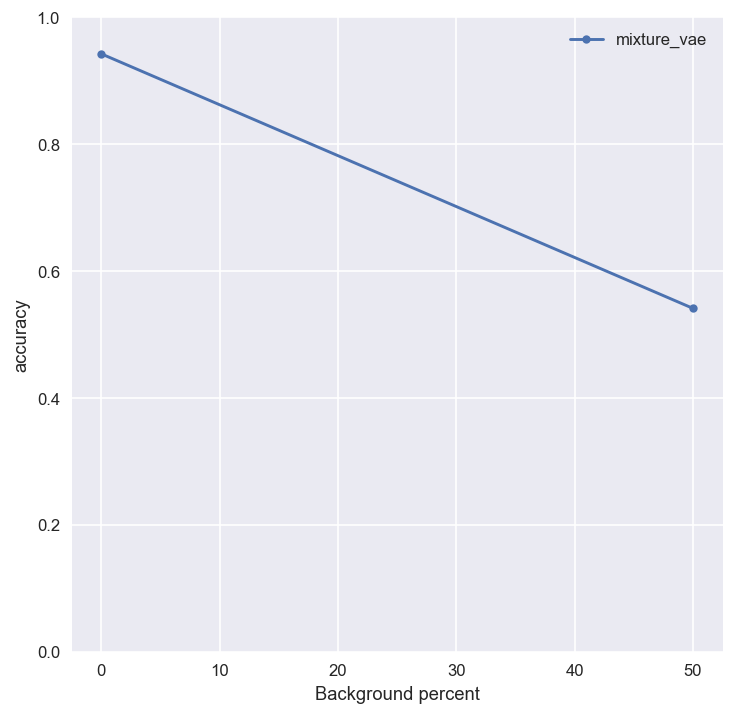

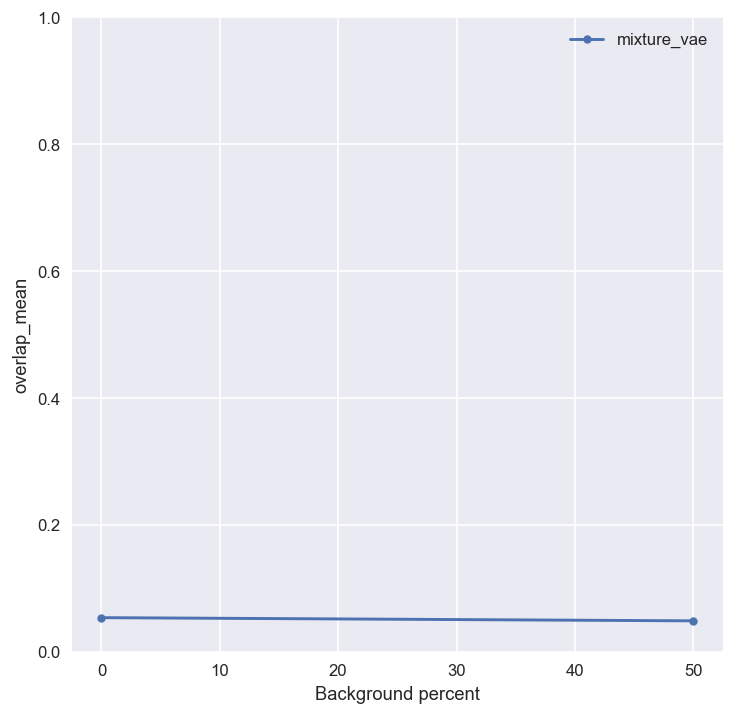

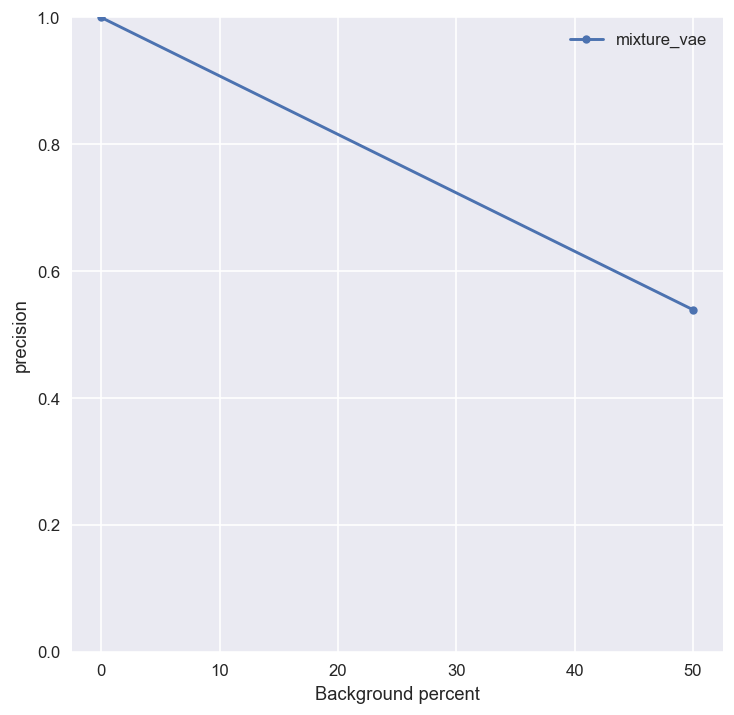

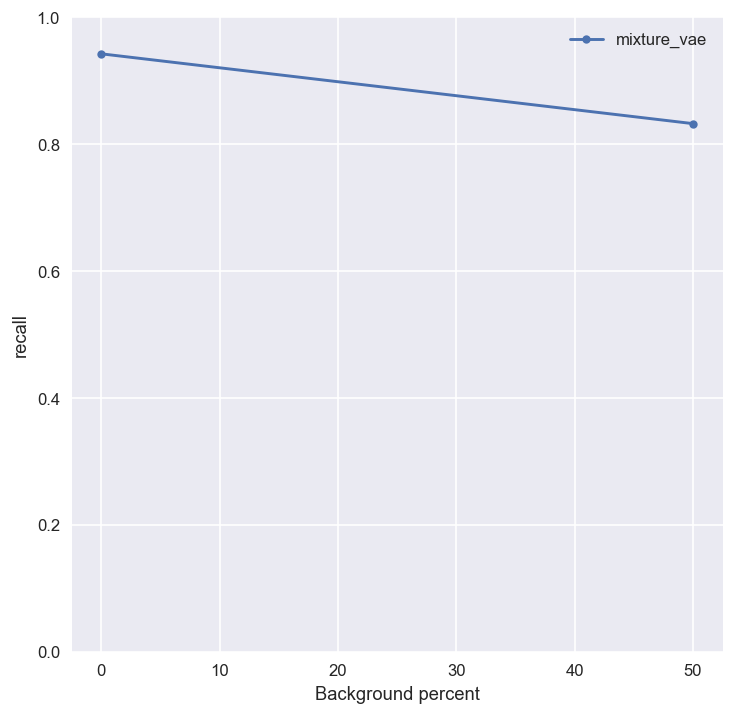

In [8]:
bg_percents = [0, 10, 20, 30, 40, 50]
for metric in ['accuracy', 'overlap_mean', 'precision', 'recall']:
    fig, ax = plt.subplots(figsize=(7, 7))
    for method in ['mixture_vae']:
        df = summary_by_bg_percent.query('method == "{}"'.format(method))
        ax.plot(df['bg_percent'], df[metric], marker='.', markersize=10, label=method)
    ax.set_ylim(0, 1)
    ax.set_ylabel(metric)
    ax.set_xlabel('Background percent')
    ax.legend()